In [6]:
import numpy            as np
import scipy.integrate
import scipy.optimize
%matplotlib inline
import matplotlib.pyplot as plt 

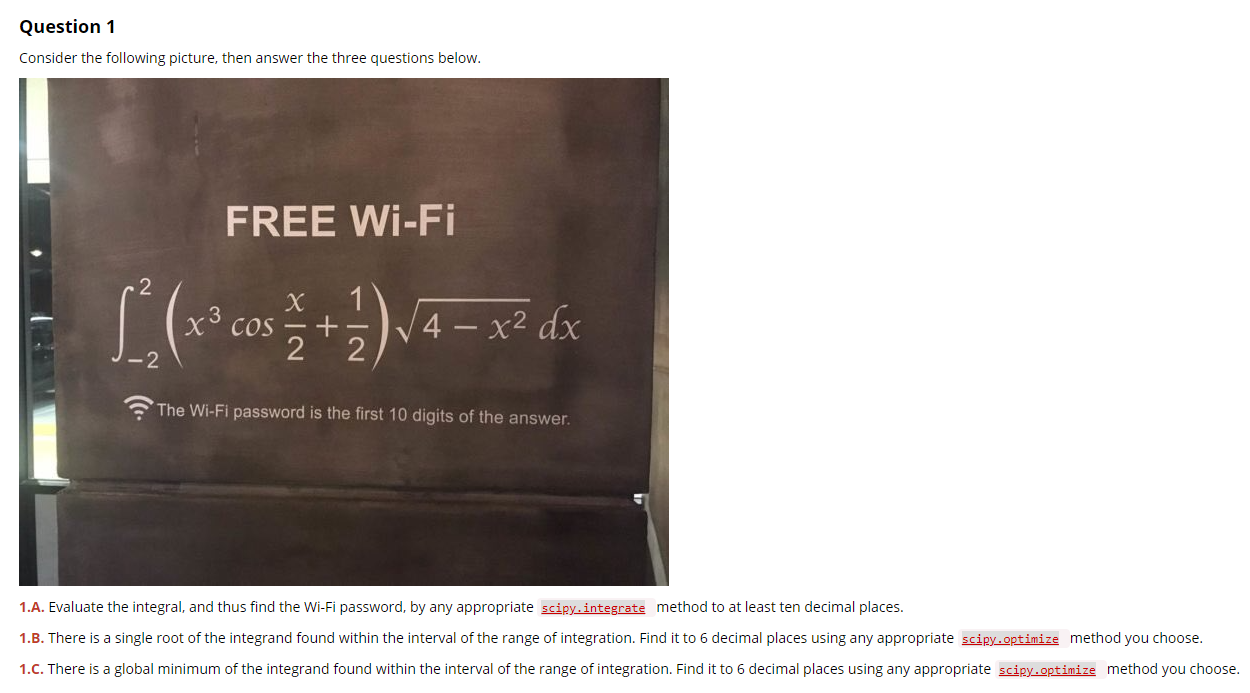

(3.1415926535897927, 4.75175454539567e-14)

3.141592653589793


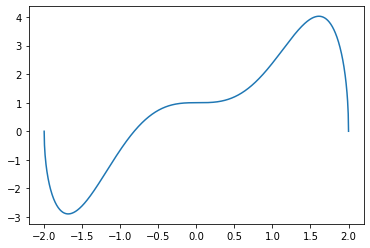


The desired root is -0.8167299973025866

verify by subbing in to integrand: 2.0268647354585134e-16 = 0



The desired global min occurs at -1.6843684630089755 and is equal to -2.8920374561995374


In [20]:
## A ##
def integrand(x):
    return (x**3*np.cos(x/2)+1/2)*np.sqrt(4-x*x)

I = scipy.integrate.quad(integrand,-2,2,epsabs=1e-12,epsrel=1e-12)
print(I)
print()
print(np.pi)

## B ##

x = np.linspace(-2,2,1000)

plt.plot(x,integrand(x))
plt.show()
plt.close()

root = scipy.optimize.root(integrand,-1)
#print(root)
print()
print('The desired root is ' + str(root.x[0]))
print()
print('verify by subbing in to integrand: ' + str(integrand(root.x[0])) + ' = 0')
print('\n')

## C ##

my_min = scipy.optimize.minimize(integrand,-1.7)
#print(my_min)
print()
print('The desired global min occurs at ' + str(my_min.x[0]) + ' and is equal to ' + str(integrand(my_min.x[0])))


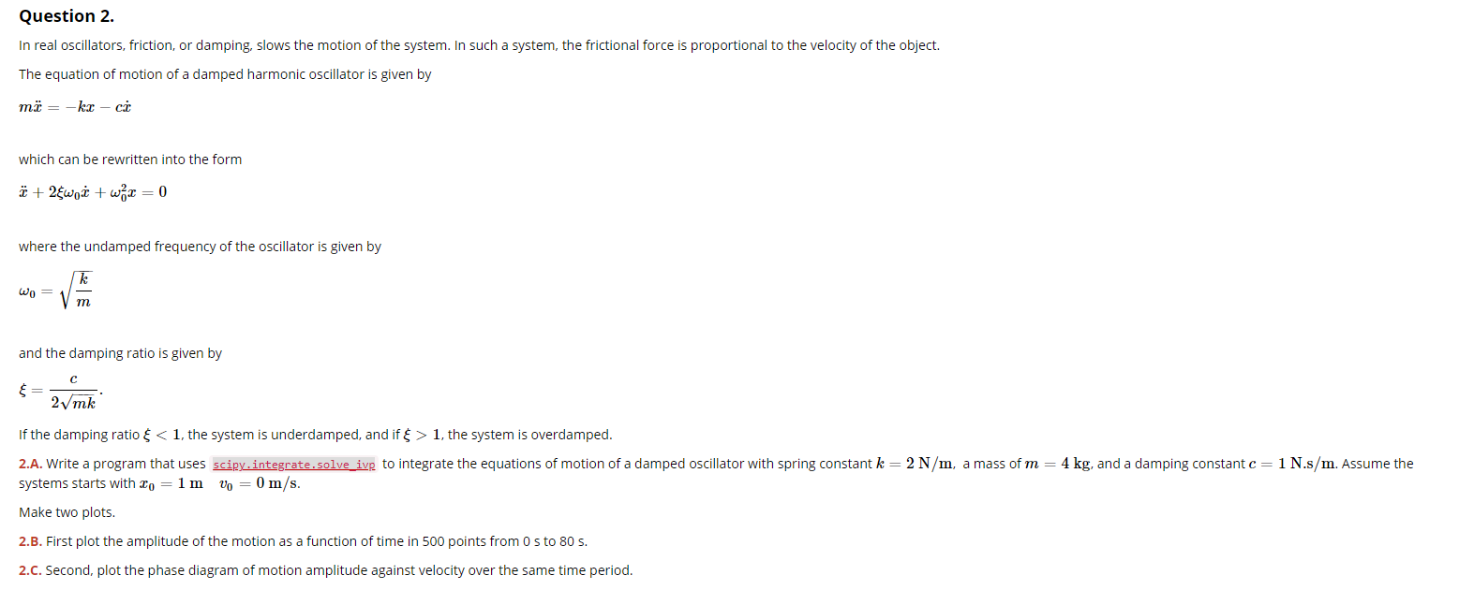

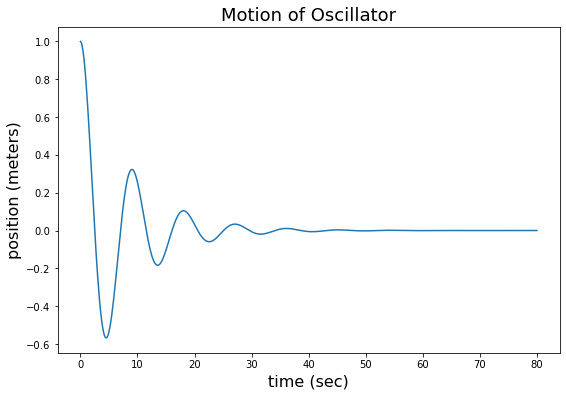

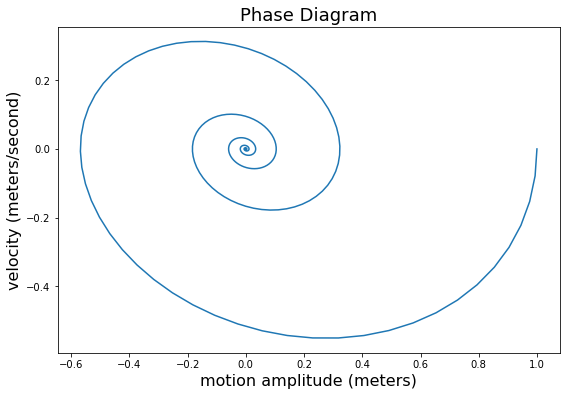

In [4]:
## A ##

# let u = xdot then udot = -2*xi*omega0*u-omega0^2*x

m = 4 #kg
k = 2 #N/m
c = 1 # N*s*m^-1

omega0    = np.sqrt(k/m)
xi        = c/(2*np.sqrt(m*k))
constants = (omega0,xi)

x0 = 1              # initial conditions
v0 = 0  
initial_point = (x0,v0)

t0 = 0
tf = 80
interval = (t0,tf)

tpoints = np.linspace(t0,tf,500)

def system(t,my_vars, *args):
    omega0, xi = args
    x, u = my_vars[0], my_vars[1]
    xdot = u
    udot = -2*xi*omega0*u-omega0**2*x
    return xdot, udot

sol = scipy.integrate.solve_ivp(system,interval,initial_point,t_eval=tpoints,args=constants)
#print(sol)

## B ##

plt.figure(figsize=(9,6))
plt.plot(tpoints,sol.y[0])
plt.title('Motion of Oscillator', fontsize=18)
plt.xlabel('time (sec)', fontsize =16)
plt.ylabel('position (meters)', fontsize =16)
plt.show()
plt.close()
print('\n')
#plt.plot(tpoints,sol.y[1])


## C ##

plt.figure(figsize=(9,6))
plt.plot(sol.y[0],sol.y[1])
plt.title('Phase Diagram', fontsize=18)
plt.xlabel('motion amplitude (meters)', fontsize =16)
plt.ylabel('velocity (meters/second)', fontsize =16)
plt.show()
plt.close()

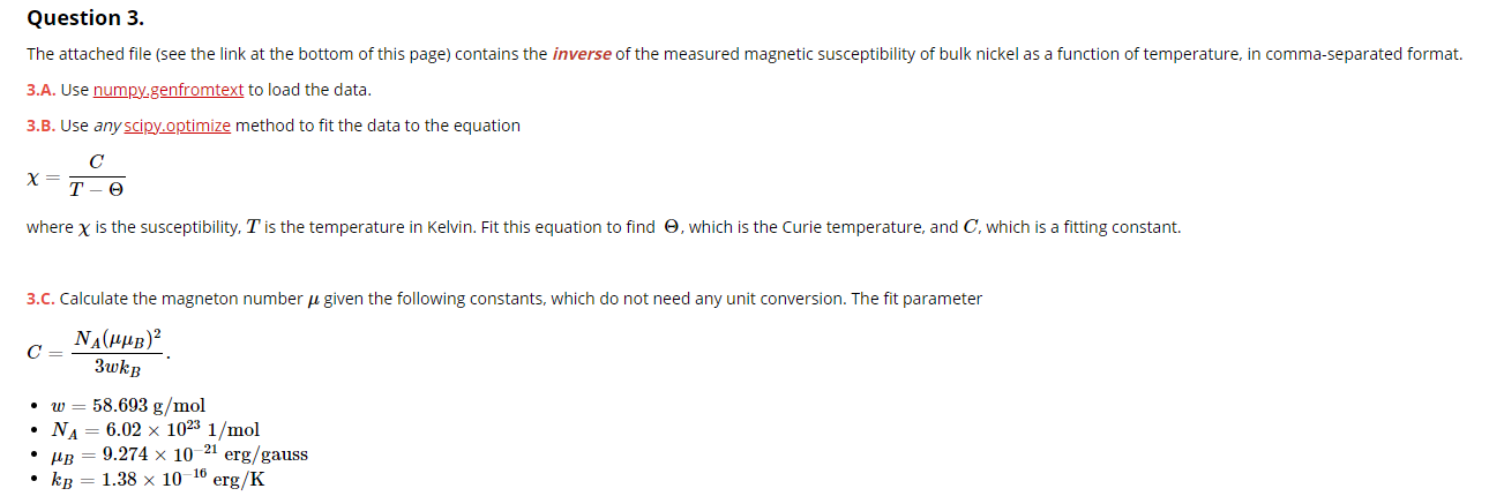

The fitting constant C is 0.005829688037698441
The Curie temperature is 642.7599443027257


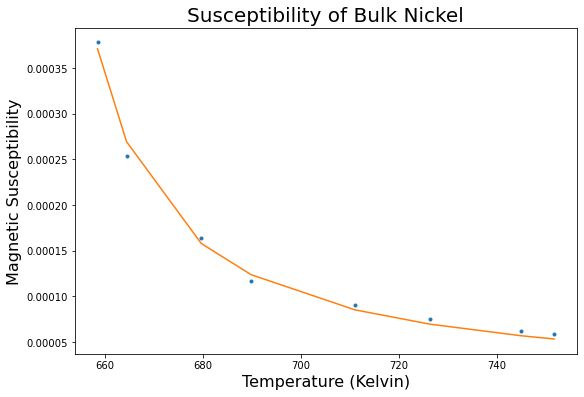


Therefore, the magneton number mu is 1.654057660912291


In [5]:
## A ##

my_data = np.genfromtxt('bulk_ni_invxi.csv',unpack=True, delimiter=",")

#print(my_data[0])
#print(my_data[1])


## B ##

temperature = my_data[0]
chi_inv     = my_data[1]

def Chi_func(T,C,Theta):
    return C/(T-Theta)

fit, covariance = scipy.optimize.curve_fit(Chi_func,temperature,1/chi_inv)
print('The fitting constant C is ' + str(fit[0]))
print('The Curie temperature is ' + str(fit[1]))

plt.figure(figsize=(9,6))
plt.plot(temperature,1/chi_inv,'.')
plt.plot(temperature,Chi_func(temperature,fit[0],fit[1]))
plt.title('Susceptibility of Bulk Nickel',fontsize=20)
plt.xlabel('Temperature (Kelvin)',fontsize=16)
plt.ylabel('Magnetic Susceptibility',fontsize=16)
plt.show()
plt.close()


## C ##

w     = 58.693           # g/mol
N_A   = 6.02*10**23      # 1/mol
mu_B  = 9.274*10**(-21)  # erg/gauss
k_B   = 1.38*10**(-16)   # erg/K

# Rearranging and solving for mu we obtain: 
# mu = sqrt(3*C*w*k_B/(N_A*mu_B^2))

print()
print('Therefore, the magneton number mu is ' + str(np.sqrt(3*fit[0]*w*k_B/(N_A*mu_B**2))))